## Preprocessing and WordClouds For Traditionally-Male Dominated and Traditionally-Female Dominated Jobs

Berra Karayel
0054477

### Loading the data

In [ ]:
import pandas as pd
import os

In [ ]:
ads_categorized = pd.read_csv("/content/linkedin-sentiment-data-annotatedd.csv")
ads_categorized.head()

,Ad Number,Position,Category,Requirements,Sentiment,Domination
0,1.0,Department Manager,Manager/director/head,Lisans Derecesi ve üç yıllık perakende deneyim...,positive,male-dominated
1,2.0,Head of Software Engineer,Engineering,Orta ölçekli bir yazılım geliştirme ekibine li...,positive,male-dominated
2,3.0,Freelance Data Engineer,Engineering,Yazılım geliştirmede üç yılı aşkın profesyonel...,positive,male-dominated
3,4.0,Tedarik Zinciri Genel Müdür Yardımcısı,Manager/director/head (assistant),Stratejik Planlama ve hedef yayılım metotların...,positive,male-dominated
4,5.0,Yeni Nesil Kariyer Deneyimi,Teaching/Teacher,Türkiye’deki üniversitelerde veya T.C. vatanda...,negative,female-dominated


In [ ]:
print(ads_categorized.dtypes)

Ad Number       float64
Position         object
Category         object
Requirements     object
Sentiment        object
Domination       object
dtype: object


In [ ]:
ads_categorized["Category"]= ads_categorized["Category"].astype("string")

In [ ]:
print(ads_categorized.dtypes)

Ad Number       float64
Position         object
Category         string
Requirements     object
Sentiment        object
Domination       object
dtype: object


### Preprocessing and Cleaning the Data

In [ ]:
ads_categorized = ads_categorized.dropna()

In [ ]:
# Removing the columns
ads_categorized = ads_categorized.drop(columns=['Sentiment', 'Ad Number'], axis=1)

# Print out the first rows of job ads
ads_categorized.head()

,Position,Category,Requirements,Domination
0,Department Manager,Manager/director/head,Lisans Derecesi ve üç yıllık perakende deneyim...,male-dominated
1,Head of Software Engineer,Engineering,Orta ölçekli bir yazılım geliştirme ekibine li...,male-dominated
2,Freelance Data Engineer,Engineering,Yazılım geliştirmede üç yılı aşkın profesyonel...,male-dominated
3,Tedarik Zinciri Genel Müdür Yardımcısı,Manager/director/head (assistant),Stratejik Planlama ve hedef yayılım metotların...,male-dominated
4,Yeni Nesil Kariyer Deneyimi,Teaching/Teacher,Türkiye’deki üniversitelerde veya T.C. vatanda...,female-dominated


In [ ]:
import re

# Convert the titles to lowercase

ads_categorized["Category_processed"] = \
ads_categorized["Category"].map(lambda x: x.lower())

# Removing punctuation

ads_categorized["Category_processed"] = \
ads_categorized["Category"].map(lambda x: re.sub('[,\.!?]', '', x))

# Print out the first rows of job ads
ads_categorized["Category_processed"].head()

0                Manager/director/head
1                          Engineering
2                          Engineering
3    Manager/director/head (assistant)
4                     Teaching/Teacher
Name: Category_processed, dtype: object

### Exploratory Analysis

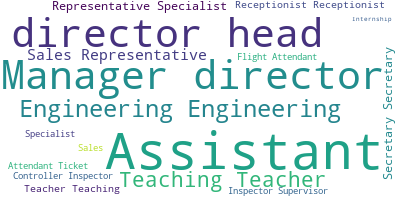

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
category_wordcloud = ','.join(list(ads_categorized["Category_processed"].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(category_wordcloud)

# Visualize the word cloud
wordcloud.to_image()

In [ ]:
female_dominated = ads_categorized.loc[ads_categorized["Domination"] == "female-dominated"]

In [ ]:
female_dominated

,Position,Category,Requirements,Domination,Category_processed
4,Yeni Nesil Kariyer Deneyimi,Teaching/Teacher,Türkiye’deki üniversitelerde veya T.C. vatanda...,female-dominated,Teaching/Teacher
11,İhracat asistanı,Assistant,"Avrupa, Afrika ve Ortadoğu piyasasında mevcut ...",female-dominated,Assistant
15,Sekreter,Secretary,"Tecrübeli veya tecrübesiz, Kocaelide ikamet ed...",female-dominated,Secretary
16,Sekreter/Ofis Asistanı,Assistant,"En az lise, tercihen MYO veya Üniversite mezu...",female-dominated,Assistant
17,Sekreter,Secretary,"Hadımköy Arnavutköy bölgesinde ikamet eden , e...",female-dominated,Secretary
18,Sekreter,Secretary,Tercihen Kadıköy veya yakın bölgede ikamet ede...,female-dominated,Secretary
19,Tıbbi Sekreter,Assistant,"Güler yüzlü, iletişimi kuvvetli, ekip çalışmas...",female-dominated,Assistant
20,Resepsiyonist,Receptionist,"Kişisel bakım ve hijyenine önem veren, ahlaki ...",female-dominated,Receptionist
21,Resepsiyonist,Receptionist,Turizm ve Otelcilik eğitimi veren Üniversite v...,female-dominated,Receptionist
22,Sekreter,Secretary,"Bizimle çalışacak, sekreteryadan sorumlu olaca...",female-dominated,Secretary


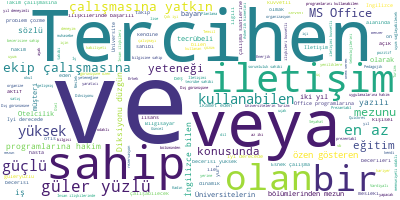

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
category_wordcloud = ','.join(list(female_dominated["Requirements"].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(category_wordcloud)

# Visualize the word cloud
wordcloud.to_image()

In [ ]:
male_dominated = ads_categorized.loc[ads_categorized["Domination"] == "male-dominated"]

In [ ]:
male_dominated

,Position,Category,Requirements,Domination,Category_processed
0,Department Manager,Manager/director/head,Lisans Derecesi ve üç yıllık perakende deneyim...,male-dominated,Manager/director/head
1,Head of Software Engineer,Engineering,Orta ölçekli bir yazılım geliştirme ekibine li...,male-dominated,Engineering
2,Freelance Data Engineer,Engineering,Yazılım geliştirmede üç yılı aşkın profesyonel...,male-dominated,Engineering
3,Tedarik Zinciri Genel Müdür Yardımcısı,Manager/director/head (assistant),Stratejik Planlama ve hedef yayılım metotların...,male-dominated,Manager/director/head (assistant)
7,İnsan Kaynakları Uzman Yardımcısı,Manager/director/head (assistant),Üniversitelerin Mühendislik veya Sosyal Biliml...,male-dominated,Manager/director/head (assistant)
8,Data Engineer,Engineering,Üniversitelerin Mühendislik bölümlerinden mezu...,male-dominated,Engineering
9,Veri Analitiği,Engineering,Üniversitelerin dört yıllık bölümlerinden mezu...,male-dominated,Engineering
10,Proje Uzman Yardımcısı,Manager/director/head (assistant),"Analiz Yapma, Raporlama ve İstatistiksel Veri ...",male-dominated,Manager/director/head (assistant)
12,Saha Satış Temsilcisi,Sales Representative/Specialist,Üniversitelerin tercihen Mühendislik bölümünle...,male-dominated,Sales Representative/Specialist
13,Üretim Mühendisi,Engineering,Üniversitelerin Mühendislik bölümlerinden mezu...,male-dominated,Engineering


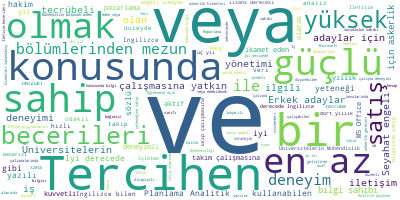

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
category_wordcloud = ','.join(list(male_dominated["Requirements"].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(category_wordcloud)

# Visualize the word cloud
wordcloud.to_image()

## Zemberek
Tokenization

In [ ]:
!pip install antlr4-python3-runtime==4.8
!pip install zemberek-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 112 kB 7.3 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=8e6377f319361e8b034aa2b675f66f983bed7ec0d5517f4b003e89622275d0c5
  Stored in directory: /root/.cache/pip/wheels/ca/33/b7/336836125fc9bb4ceaa4376d8abca10ca8bc84ddc824baea6c
Successfully built antlr4-python3-runtime
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 93.6 MB 1.3 MB/s 


In [ ]:
pip install zemberek-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import time
import logging

from zemberek import (TurkishSpellChecker, TurkishSentenceNormalizer, TurkishSentenceExtractor, TurkishMorphology, TurkishTokenizer)

logger = logging.getLogger(__name__)

morphology = TurkishMorphology.create_with_defaults()
normalizer = TurkishSentenceNormalizer(morphology)
extractor = TurkishSentenceExtractor()

2022-06-09 09:57:10,062 - zemberek.morphology.turkish_morphology - INFO
Msg: TurkishMorphology instance initialized in 22.307997941970825



Sentence Normalization

In [19]:
def normalize_long_text(text):
    normalized_sentences = [normalizer.normalize(word) for word in text]
    normalized_text = " ".join(normalized_sentences)
    return normalized_text

Stop Words

In [23]:
import nltk

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
from nltk.corpus import stopwords
import re
stops = set(stopwords.words('turkish'))
print(stops)

{'tüm', 'ama', 'da', 'şu', 'gibi', 'birşey', 'biz', 'bazı', 'nerede', 'hiç', 'ise', 'hep', 'belki', 'hepsi', 'az', 'hem', 'eğer', 'nerde', 'ya', 'çünkü', 'çok', 'kim', 'de', 'nereye', 'siz', 'şey', 've', 'daha', 'aslında', 'sanki', 'defa', 'mı', 'nasıl', 'ne', 'veya', 'ki', 'en', 'diye', 'birkaç', 'bu', 'mu', 'için', 'o', 'mü', 'her', 'ile', 'acaba', 'neden', 'biri', 'niye', 'yani', 'kez', 'niçin'}


In [26]:
splitted_words = []
for sent in new_sent:
    words = sent.split()
    splitted_words.append(words)

In [27]:
clean_sent = []
for sentence in splitted_words:
    new_sentence = [w for w in sentence if w not in stops]
    clean_sent.append(new_sentence)

Lemmatization

In [28]:
for token in clean_sent:
    j = 0
    for word in token:
        new_word = word.replace('"', '').replace("’", '').replace("'", '').replace("”", '')
        token[j] = new_word
        j += 1

In [29]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

True

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [35]:
pip install zeyrek

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 930 kB 4.9 MB/s 


In [36]:
 import zeyrek
 analyzer = zeyrek.MorphAnalyzer()

In [50]:
lem_sent = []
for sent in clean_sent:
    normalized_sent = []
    for word in sent:
        if word == '':
            continue
        else:
            lem_word = analyzer.lemmatize(word)
            normalized_sent.append(lem_word[0][1[0]])
    lem_sent.append(normalized_sent)

In [51]:
x = lem_sent.copy()
for sent in x:
    i = 0
    for token in sent:
        sent[i] = token.lower()
        i += 1
lem_sent = x

In [52]:
lem_sent = list(filter(('').__ne__, lem_sent))

In [53]:
ads_categorized["Requirements"].head(5)

0    Lisans Derecesi ve üç yıllık perakende deneyim...
1    Orta ölçekli bir yazılım geliştirme ekibine li...
2    Yazılım geliştirmede üç yılı aşkın profesyonel...
3    Stratejik Planlama ve hedef yayılım metotların...
4    Türkiye’deki üniversitelerde veya T.C. vatanda...
Name: Requirements, dtype: object

In [58]:
import numpy as np

In [60]:
ads_categorized['Requirements'].series = lem_sent
ads_categorized['Requirements'].head()

0    Lisans Derecesi ve üç yıllık perakende deneyim...
1    Orta ölçekli bir yazılım geliştirme ekibine li...
2    Yazılım geliştirmede üç yılı aşkın profesyonel...
3    Stratejik Planlama ve hedef yayılım metotların...
4    Türkiye’deki üniversitelerde veya T.C. vatanda...
Name: Requirements, dtype: object

In [61]:
ads_categorized['Requirements'] = ads_categorized.Requirements.apply(' '.join)

In [62]:
ads_categorized['Requirements'].to_csv("lemmatized_ads_categorized.csv")

### Creating WordClouds


In [63]:
from wordcloud import WordCloud, STOPWORDS

def creat_wordcloud(tweets):
    comment_words = ''
    stopwords = set(STOPWORDS)
    
    # iterate through the csv file
    for val in tweets:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 1200, height = 800,
                    background_color ='white',
                    max_words=3000,
                    stopwords = stopwords,
                    min_font_size = 10,
                    repeat = True).generate(comment_words)

    # plot the WordCloud image                       
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

In [73]:
ads_lemmatized = pd.read_csv("/content/ads_preprocessed.csv")
ads_lemmatized.head(5)

,Unnamed: 0,Requirements,Requirements_processed
0,0.0,sans derece ve üç yılk perakende deneyim...,sans derece ve üç yılk perakende deneyim...
1,1.0,orta ölçek bir yazım geştirme ekibi derk eden ...,orta ölçek bir yazım geştirme ekibi derk eden ...
2,2.0,stratejik planlama ve hedef yayım metotlar etk...,stratejik planlama ve hedef yayım metotlar etk...
3,3.0,stratejik planlama ve hedef yayım metotlar etk...,stratejik planlama ve hedef yayım metotlar etk...
4,4.0,türkiye üniversiteler veya t.c. vatanş olarak ...,türkiye üniversiteler veya t.c. vatanş olarak ...


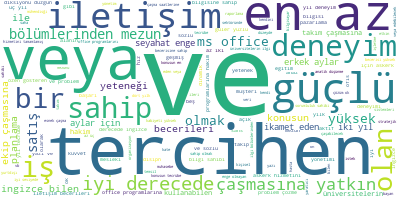

In [75]:
# All Data Set
category_wordcloud = ','.join(list(ads_lemmatized["Requirements_processed"].values))
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(category_wordcloud)
wordcloud.to_image()

In [81]:
female_dominated_ads = pd.read_csv("/content/female dominated job ads.csv")
female_dominated_ads.head()

,Ad Number,Position,Category,Requirements,Requirements_processed,Sentiment,Domination
0,5,Yeni Nesil Kariyer Deneyimi,Teaching/Teacher,Türkiye’deki üniversitelerde veya T.C. vatanda...,türkiye’deki üniversitelerde veya t.c. vatanda...,negative,female-dominated
1,12,İhracat asistanı,Assistant,Avrupa Afrika ve Ortadoğu piyasasında mevcut d...,avrupa afrika ve ortadoğu piyasasında mevcut d...,negative,female-dominated
2,16,Sekreter,Secretary,Tecrübeli veya tecrübesiz Kocaelide ikamet ede...,tecrübeli veya tecrübesiz kocaelide ikamet ede...,negative,female-dominated
3,17,Sekreter/Ofis Asistanı,Assistant,En az lise MYO veya Üniversite mezunu Başlan...,en az lise myo veya üniversite mezunu başlan...,negative,female-dominated
4,18,Sekreter,Secretary,Hadımköy Arnavutköy bölgesinde ikamet eden ek...,hadımköy arnavutköy bölgesinde ikamet eden ek...,negative,female-dominated


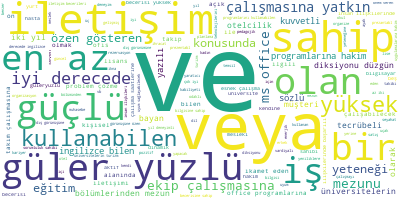

In [82]:
# Mostly Occurred Keywords in Traditionally-Female-Dominated Job Ads
category_wordcloud = ','.join(list(female_dominated_ads["Requirements_processed"].values))
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(category_wordcloud)
wordcloud.to_image()

In [83]:
male_dominated_ads = pd.read_csv("/content/male dominated ads.csv")
male_dominated_ads.head()

,Ad Number,Position,Category,Requirements,Requirements_processed,Sentiment,Domination
0,1,Department Manager,Manager/director/head,Lisans Derecesi ve üç yıllık perakende deneyim...,lisans derecesi ve üç yıllık perakende deneyim...,positive,male-dominated
1,2,Head of Software Engineer,Engineering,Orta ölçekli bir yazılım geliştirme ekibine li...,orta ölçekli bir yazılım geliştirme ekibine li...,positive,male-dominated
2,3,Freelance Data Engineer,Engineering,Yazılım geliştirmede üç yılı aşkın profesyonel...,yazılım geliştirmede üç yılı aşkın profesyonel...,positive,male-dominated
3,4,Tedarik Zinciri Genel Müdür Yardımcısı,Manager/director/head (assistant),Stratejik Planlama ve hedef yayılım metotların...,stratejik planlama ve hedef yayılım metotların...,positive,male-dominated
4,8,İnsan Kaynakları Uzman Yardımcısı,Manager/director/head (assistant),Üniversitelerin Mühendislik veya Sosyal Biliml...,üniversitelerin mühendislik veya sosyal biliml...,positive,male-dominated


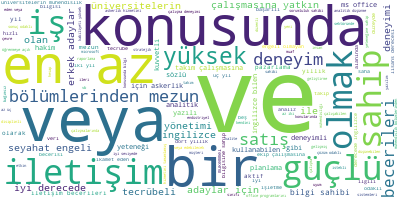

In [84]:
# Mostly Occurred Keywords in Traditionally-Male-Dominated Job Ads
category_wordcloud = ','.join(list(male_dominated_ads["Requirements_processed"].values))
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(category_wordcloud)
wordcloud.to_image()